In [3]:
import pandas as pd
import numpy as np

In [4]:
from multi_objective_vehicle_routing_problem import *

# NDP

In [5]:
# NDP problem
ndp_problem = NDP_MultiObjectiveVehicleRoutingProblem(
    number_of_ndp_customer=NUMBER_OF_NDP_CUSTOMER,
    range_of_ndp_customer=RANGE_OF_NDP_CUSTOMER,
)




NDP_MultiObjectiveVehicleRoutingProblem


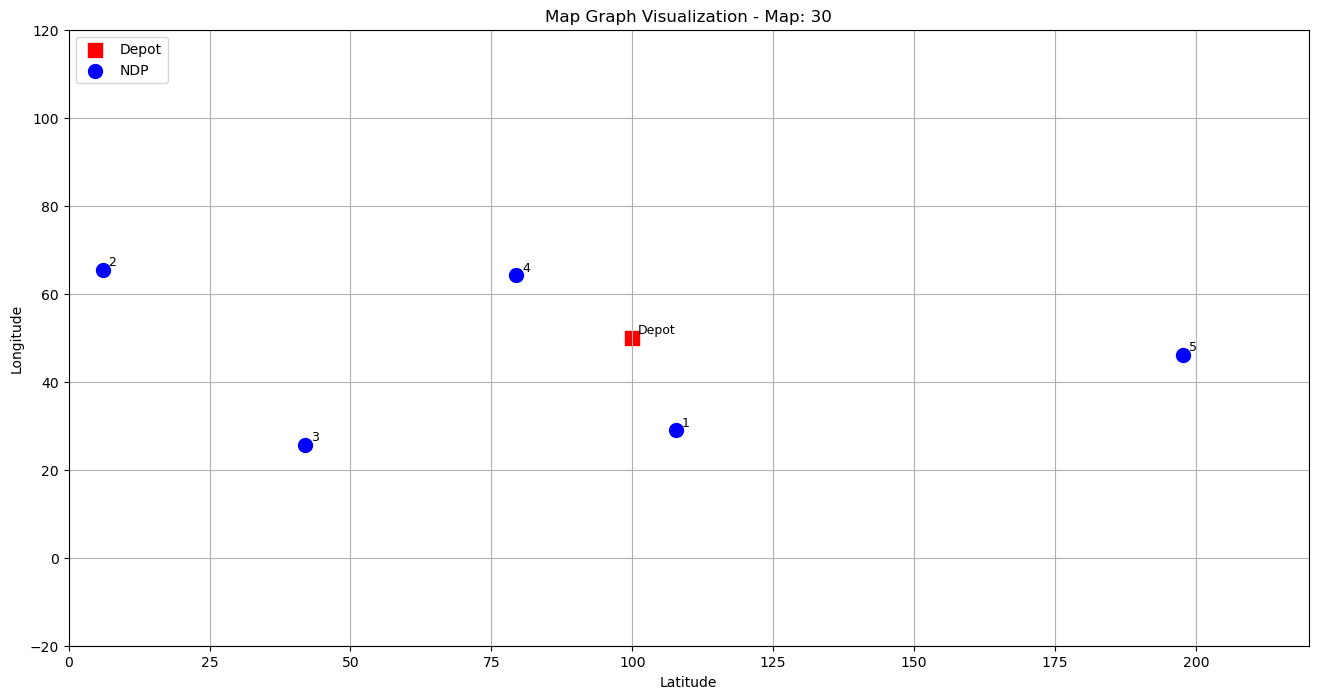

In [6]:

ndp_problem.visualize()


In [7]:
distance_matrix_ndp = ndp_problem.map_graph.distance_matrix
distance_matrix_ndp = pd.DataFrame(distance_matrix_ndp)
distance_matrix_ndp

,0,1,2,3,4,5
0,0.000000,22.482834,95.239955,62.872469,24.963358,97.837850
1,22.482834,0.000000,108.135180,65.891955,45.243366,91.582014
2,95.239955,108.135180,0.000000,53.540585,73.442199,192.714657
3,62.872469,65.891955,53.540585,0.000000,53.651435,157.094043
4,24.963358,45.243366,73.442199,53.651435,0.000000,119.684485
5,97.837850,91.582014,192.714657,157.094043,119.684485,0.000000


In [8]:

ndp_algorithm = NSGA2(
    pop_size=1000,
    n_offsprings=20,
    sampling=CustomRandomSampling(NUMBER_OF_NDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)


In [9]:

# Run the optimization
ndp_res = minimize(ndp_problem, ndp_algorithm, ("n_gen", 200), verbose=False)



SOLUTION 0
[[3, 1], [4, 2], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 1
[[5, 2, 3], [1, 4]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 2
[[2, 4], [5, 3, 1]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 3
[[4], [5, 2, 3], [1]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 4
[[1, 4], [3, 5, 2]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 5
[[4, 2, 3, 1, 5]]
- Maximum length among trucks: 407.25796136719254
- Number of trucks used: 1

SOLUTION 6
[[2, 4], [3, 5, 1]]
- Maximum length among trucks: 214.8186107334388
- Number of trucks used: 2

SOLUTION 7
[[1, 4], [2], [5, 3]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 8
[[4], [1, 2, 3], [5]]
- Maximum length among trucks: 195.67569956159602
- Number of trucks used: 3

SOLUTION 9
[[3, 

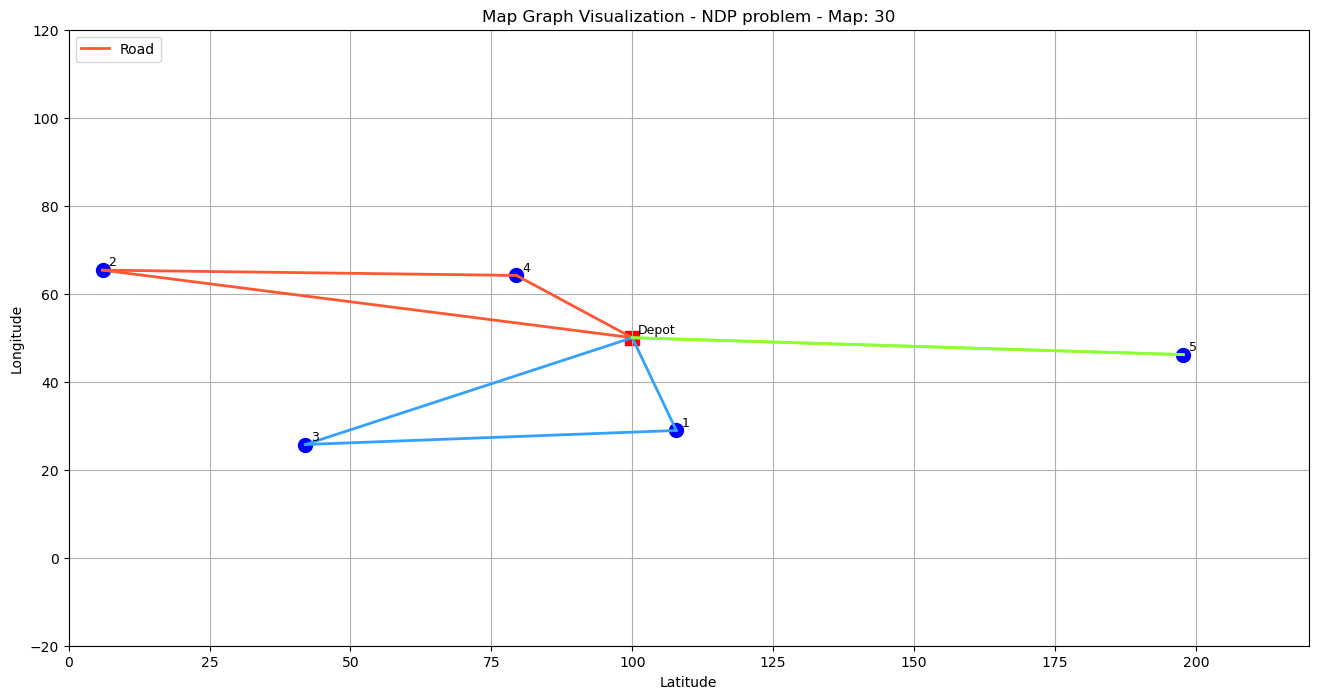

In [10]:

# Create solution handler
ndp_solution_handler = SolutionHandler(ndp_problem.get_map_graph())
ndp_solution_handler.set_result(ndp_res)
ndp_solution_handler.print_best_solutions(100)
ndp_solution_handler.visualize_solution("NDP problem")


# Indipendent HDP



Independent HDP_MultiObjectiveVehicleRoutingProblem


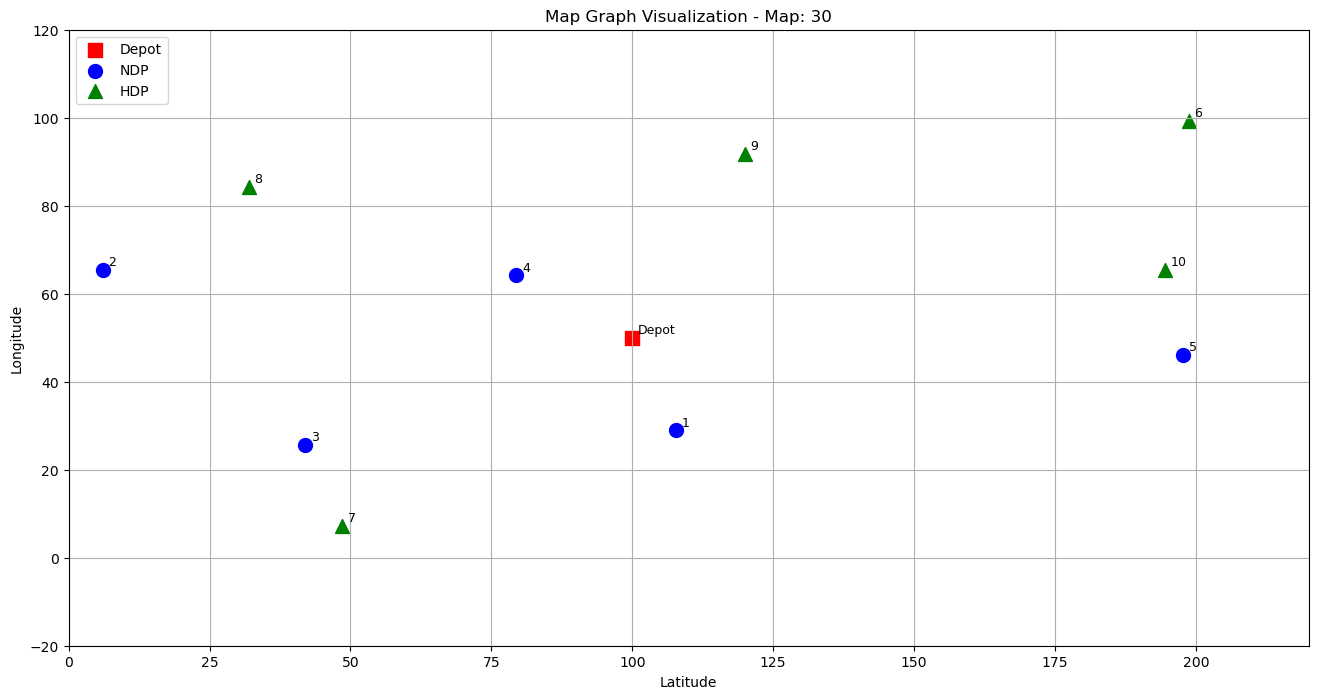

In [11]:

# HDP problem without solution from NDP (independent HDP problem)
ind_hdp_problem = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    initial_map_graph=ndp_problem.get_map_graph(),
)

ind_hdp_problem.visualize()


In [12]:

ind_hdp_algorithm = NSGA2(
    pop_size=1000,
    n_offsprings=20,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)


In [13]:

# Run the optimization
ind_hdp_res = minimize(
    ind_hdp_problem, ind_hdp_algorithm, ("n_gen", 200), verbose=False
)



SOLUTION 0
[[5], [10], [2, 3], [8, 7], [6], [9], [4, 1]]
- Maximum length among trucks: 220.61160042790138
- Number of trucks used: 7

SOLUTION 1
[[2], [9, 7], [5, 3], [6], [1, 4], [8], [10]]
- Maximum length among trucks: 220.61160042790138
- Number of trucks used: 7

SOLUTION 2
[[6, 4], [9], [1], [5, 8], [2], [10], [3, 7]]
- Maximum length among trucks: 220.61160042790138
- Number of trucks used: 7

SOLUTION 3
[[3], [10, 8], [7, 5], [1, 9, 2], [6, 4]]
- Maximum length among trucks: 234.13585737459226
- Number of trucks used: 5

SOLUTION 4
[[1, 5, 6], [9, 8, 7], [2, 4], [3, 10]]
- Maximum length among trucks: 261.25577710570144
- Number of trucks used: 4


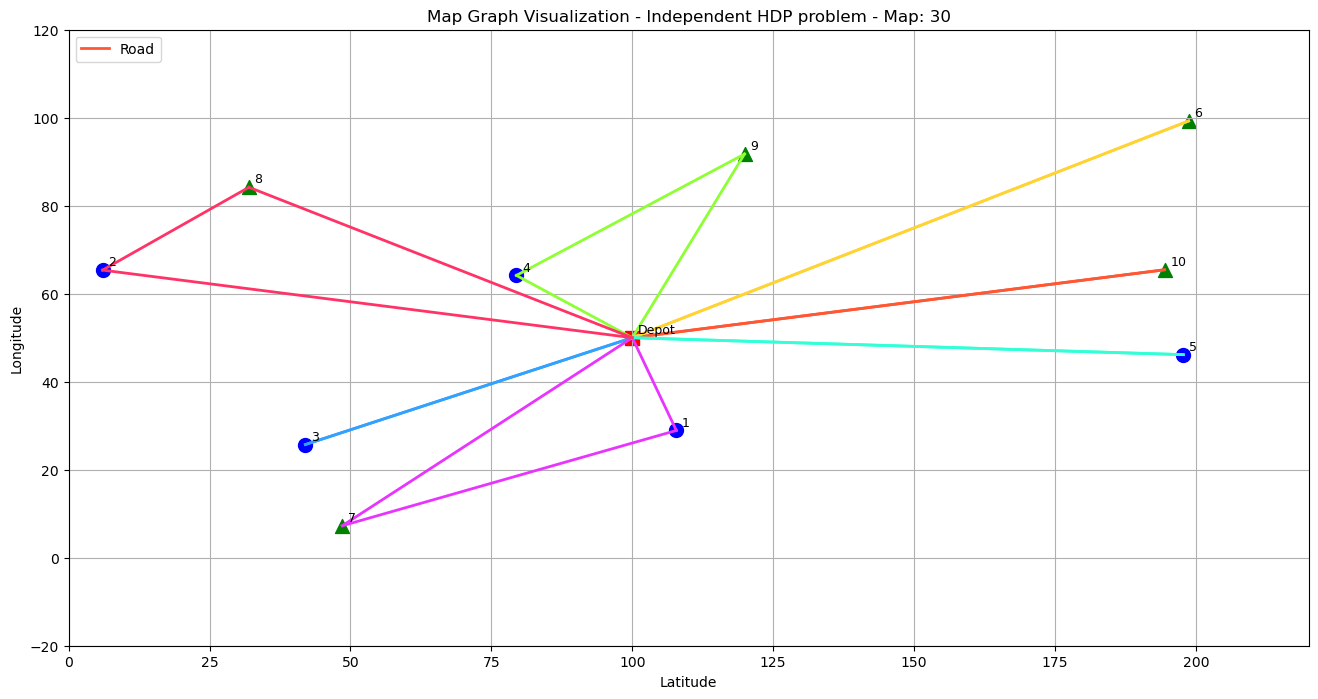

In [14]:

# Create solution handler
ind_hdp_solution_handler = SolutionHandler(ind_hdp_problem.get_map_graph())
ind_hdp_solution_handler.set_result(ind_hdp_res)
ind_hdp_solution_handler.print_best_solutions(5)
ind_hdp_solution_handler.visualize_solution("Independent HDP problem")


# Dependent HDP

In [15]:

# HDP problem with initial NDP solutions
dep_hdp_problem = HDP_MultiObjectiveVehicleRoutingProblem(
    ndp_customer_list=ndp_problem.get_ndp_customer_list(),
    number_of_hdp_customer=NUMBER_OF_HDP_CUSTOMER,
    range_of_hdp_customer=RANGE_OF_HDP_CUSTOMER,
    initial_map_graph=ind_hdp_problem.get_map_graph(),
    ndp_solution=ndp_solution_handler.get_best_solutions(-1),
    former_hdp_customer_list=ind_hdp_problem.get_hdp_customer_list(),
)




Dependent HDP_MultiObjectiveVehicleRoutingProblem


In [16]:

# dep_hdp_problem.visualize()

dep_hdp_algorithm = NSGA2(
    pop_size=len(ndp_solution_handler.get_best_solutions(-1)),
    n_offsprings=20,
    sampling=CustomRandomSampling(NUMBER_OF_HDP_CUSTOMER),
    crossover=SBX(prob=0.9, eta=15),
    mutation=PM(eta=20),
    eliminate_duplicates=True,
)


In [17]:

# Run the optimization
dep_hdp_res = minimize(
    dep_hdp_problem, dep_hdp_algorithm, ("n_gen", 200), verbose=False
)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



SOLUTION 0
[[3, 4, 2], [1], [5], [10], [7], [8, 9], [6]]
- Maximum length among trucks: 220.61160042790138
- Number of trucks used: 7

SOLUTION 1
[[5], [1, 2], [3, 4], [10], [9, 8], [7], [6]]
- Maximum length among trucks: 220.61160042790138
- Number of trucks used: 7

SOLUTION 2
[[4, 2, 3, 1, 5], [7, 10, 9, 8, 6]]
- Maximum length among trucks: 442.7507597503319
- Number of trucks used: 2

SOLUTION 3
[[4, 2, 3, 1, 5], [7, 10, 9, 8, 6]]
- Maximum length among trucks: 442.7507597503319
- Number of trucks used: 2

SOLUTION 4
[[4, 2, 1], [3, 5], [9, 7], [6, 10, 8]]
- Maximum length among trucks: 255.16533779264722
- Number of trucks used: 4


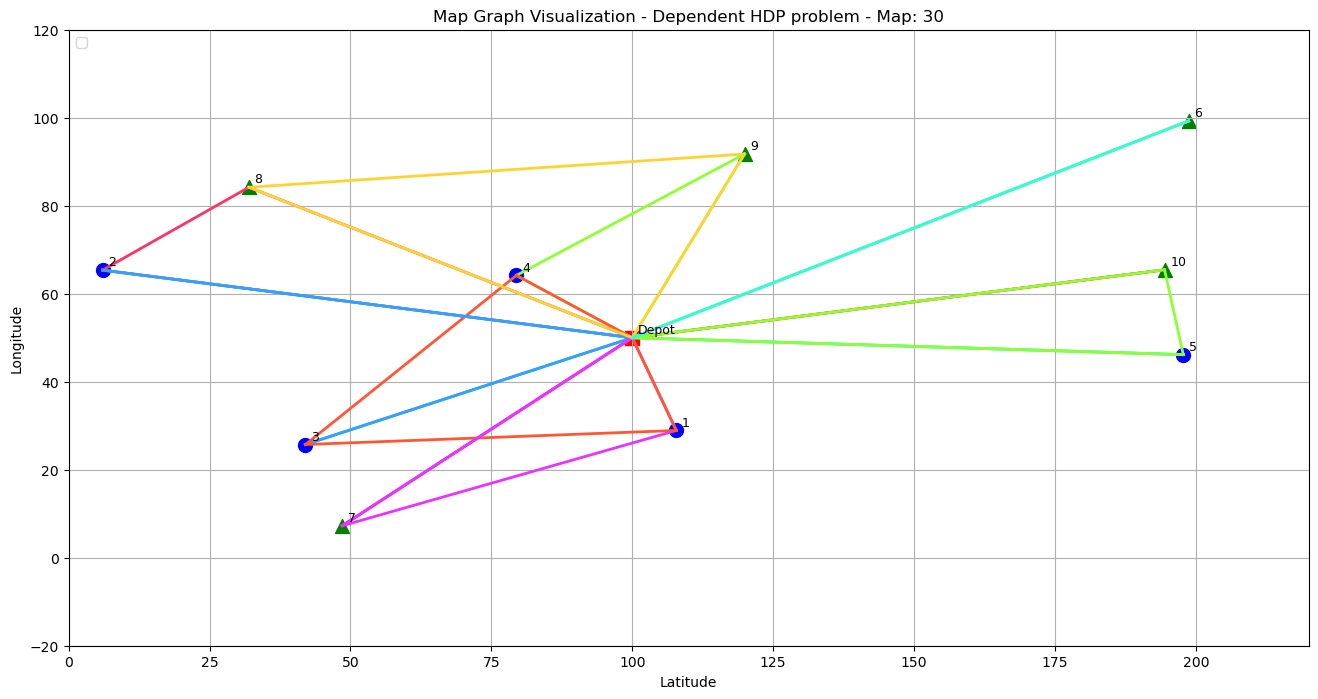

In [18]:

# Create solution handler
dep_hdp_solution_handler = SolutionHandler(dep_hdp_problem.get_map_graph())
dep_hdp_solution_handler.set_result(dep_hdp_res)
dep_hdp_solution_handler.print_best_solutions(5)
dep_hdp_solution_handler.visualize_solution("Dependent HDP problem")



# Visualization prep

## Helper functions

In [130]:
def segment_customers_orders_by_cars(customers_orders):
    customers_by_cars_solutions = [
        np.array_split(customers_order, np.random.randint(1, len(customers_orders[0])+1)) for customers_order in customers_orders
    ]
    customers_by_cars_solutions = [
        [list(car + 1) for car in solution] for solution in customers_by_cars_solutions
    ]

    return customers_by_cars_solutions




In [131]:
def find_edges_including_depot(solution):
    edges = []
    for car in solution:
        if len(car) == 0:
            continue
        edges.append([0, car[0]])
        if len(car) > 1:
            for i in range(len(car) - 1):
                edge = [car[i], car[i + 1]]
                edges.append(edge)
        edges.append([car[-1], 0])
    return edges

In [132]:
def calulate_similarity_single_pair(hdp_edges, ndp_edges):
    # Initialize a counter for similar edges
    similar_count = 0
    
    # Convert edges to sets for easier comparison
    hdp_edges_set = set(map(tuple, hdp_edges))
    ndp_edges_set = set(map(tuple, ndp_edges))
    
    # Count the number of similar edges
    similar_count = len(hdp_edges_set.intersection(ndp_edges_set))
    
    return similar_count/len(ndp_edges)


In [133]:
def caclculate_similarity_hdp_to_set_ndps(hdp_solution, ndp_solutions_set):
    hdp_edges = find_edges_including_depot(hdp_solution)
    ndp_solutions_edges = [find_edges_including_depot(ndp_solution) for ndp_solution in ndp_solutions_set]
    
    # Calculate similarities using list comprehension
    similarities = [calulate_similarity_single_pair(hdp_edges, ndp_edges) for ndp_edges in ndp_solutions_edges]
    max_similarity_index = np.argmax(similarities)
    max_similarity = similarities[max_similarity_index]
    corresponding_edge = ndp_solutions_edges[max_similarity_index]
    
    return max_similarity, corresponding_edge, hdp_edges

In [134]:
distance_matrix_dep_hdp = dep_hdp_problem.map_graph.distance_matrix
# distance_matrix_dep_hdp = pd.DataFrame(distance_matrix_dep_hdp)
distance_matrix_dep_hdp

array([[  0.        ,  22.48283367,  95.23995516,  62.87246894,
         24.96335789,  97.83784978, 110.30580021,  66.89513355,
         76.12929663,  46.25145946,  95.6880886 ],
       [ 22.48283367,   0.        , 108.13518047,  65.89195549,
         45.243366  ,  91.5820143 , 114.92031851,  63.11262971,
         93.84009986,  63.98025932,  94.00269265],
       [ 95.23995516, 108.13518047,   0.        ,  53.54058462,
         73.44219929, 192.71465681, 195.64779086,  72.00076866,
         32.07851263, 116.91900689, 188.42641648],
       [ 62.87246894,  65.89195549,  53.54058462,   0.        ,
         53.65143456, 157.09404348, 173.08958493,  19.58507263,
         59.31531051, 102.11904323, 157.52080023],
       [ 24.96335789,  45.243366  ,  73.44219929,  53.65143456,
          0.        , 119.68448532, 124.31521019,  64.74520744,
         51.51412618,  48.98003023, 115.00127491],
       [ 97.83784978,  91.5820143 , 192.71465681, 157.09404348,
        119.68448532,   0.        ,  53.1

## Generate sample solutions

In [20]:
NDP_CUSTOMERS = 5
HDP_CUSTOMERS = 10
MAX_CARS = 10
FORCE_SAME_CAR = False


In [137]:
np.random.seed(42)

ndp_customers_orders, hdp_customers_orders_dep, hdp_customers_orders_ind, hdp_customers_orders_3obj = [
    [np.random.permutation(customers) for _ in range(100)]
    for customers in [NDP_CUSTOMERS, HDP_CUSTOMERS, HDP_CUSTOMERS, HDP_CUSTOMERS]
]

ndp_customers_orders, hdp_customers_orders_dep, hdp_customers_orders_ind, hdp_customers_orders_3obj

([array([1, 4, 2, 0, 3]),
  array([3, 1, 2, 0, 4]),
  array([1, 0, 3, 4, 2]),
  array([0, 1, 2, 3, 4]),
  array([0, 2, 3, 1, 4]),
  array([4, 2, 0, 3, 1]),
  array([2, 0, 4, 1, 3]),
  array([1, 2, 4, 0, 3]),
  array([0, 3, 1, 4, 2]),
  array([0, 1, 2, 4, 3]),
  array([0, 1, 4, 3, 2]),
  array([1, 3, 4, 2, 0]),
  array([3, 1, 2, 0, 4]),
  array([4, 2, 1, 0, 3]),
  array([2, 3, 4, 0, 1]),
  array([0, 4, 2, 3, 1]),
  array([1, 4, 2, 0, 3]),
  array([4, 2, 1, 3, 0]),
  array([0, 2, 4, 1, 3]),
  array([2, 0, 4, 3, 1]),
  array([0, 2, 3, 4, 1]),
  array([0, 4, 2, 1, 3]),
  array([4, 2, 1, 0, 3]),
  array([2, 1, 0, 3, 4]),
  array([2, 0, 1, 3, 4]),
  array([1, 2, 0, 4, 3]),
  array([1, 3, 0, 2, 4]),
  array([3, 1, 4, 2, 0]),
  array([1, 4, 2, 3, 0]),
  array([1, 3, 4, 0, 2]),
  array([3, 1, 4, 2, 0]),
  array([4, 3, 2, 0, 1]),
  array([2, 4, 0, 1, 3]),
  array([3, 0, 1, 2, 4]),
  array([1, 3, 4, 0, 2]),
  array([4, 1, 3, 0, 2]),
  array([1, 3, 4, 0, 2]),
  array([3, 2, 0, 4, 1]),
  array([2, 

In [138]:
# Simplified assignment of customer orders by cars
ndp_customers_by_cars, hdp_customers_by_cars_dep, hdp_customers_by_cars_ind, hdp_customers_by_cars_3obj = [
    segment_customers_orders_by_cars(customers_orders=orders)
    for orders in (ndp_customers_orders, hdp_customers_orders_dep, hdp_customers_orders_ind, hdp_customers_orders_3obj)
]
ndp_customers_by_cars

[[[2, 5], [3], [1], [4]],
 [[4, 2, 3, 1, 5]],
 [[2, 1], [4], [5], [3]],
 [[1], [2], [3], [4], [5]],
 [[1, 3], [4], [2], [5]],
 [[5, 3, 1], [4, 2]],
 [[3, 1], [5], [2], [4]],
 [[2, 3], [5, 1], [4]],
 [[1, 4], [2], [5], [3]],
 [[1, 2, 3], [5, 4]],
 [[1, 2, 5], [4, 3]],
 [[2, 4, 5, 3, 1]],
 [[4], [2], [3], [1], [5]],
 [[5, 3], [2], [1], [4]],
 [[3, 4, 5, 1, 2]],
 [[1], [5], [3], [4], [2]],
 [[2, 5], [3], [1], [4]],
 [[5, 3], [2, 4], [1]],
 [[1, 3], [5], [2], [4]],
 [[3, 1, 5], [4, 2]],
 [[1, 3, 4], [5, 2]],
 [[1, 5], [3, 2], [4]],
 [[5, 3, 2, 1, 4]],
 [[3], [2], [1], [4], [5]],
 [[3, 1], [2], [4], [5]],
 [[2, 3, 1], [5, 4]],
 [[2, 4, 1, 3, 5]],
 [[4, 2], [5, 3], [1]],
 [[2, 5, 3], [4, 1]],
 [[2, 4], [5, 1], [3]],
 [[4, 2], [5], [3], [1]],
 [[5], [4], [3], [1], [2]],
 [[3, 5, 1], [2, 4]],
 [[4, 1, 2], [3, 5]],
 [[2, 4], [5], [1], [3]],
 [[5, 2, 4, 1, 3]],
 [[2], [4], [5], [1], [3]],
 [[4, 3, 1], [5, 2]],
 [[3], [2], [5], [4], [1]],
 [[5, 3, 1], [2, 4]],
 [[2], [1], [4], [3], [5]],
 [[2, 5]

In [112]:
hdp_customers_by_cars_dep

[[[8, 4], [5], [10], [7], [6], [9], [1], [2], [3]],
 [[9, 1, 4, 5], [8, 3, 10], [7, 6, 2]],
 [[10, 4], [7, 2], [5, 6], [3, 9], [1, 8]],
 [[6], [7], [8], [10], [9], [4], [5], [1], [2], [3]],
 [[2, 9], [5, 3], [10], [7], [6], [8], [1], [4]],
 [[5, 4, 9, 1, 3], [6, 7, 8, 10, 2]],
 [[9, 5], [8, 7], [3, 2], [4, 1], [10], [6]],
 [[6, 1], [2, 3], [9, 7], [10, 4], [5, 8]],
 [[1], [9], [6], [8], [2], [5], [10], [7], [3], [4]],
 [[9, 5], [6], [2], [4], [10], [7], [8], [1], [3]],
 [[3, 2], [9, 8], [4, 1], [7, 6], [10, 5]],
 [[8, 3, 5, 4, 9], [6, 2, 7, 1, 10]],
 [[10, 2], [4, 3], [6, 5], [9, 8], [7, 1]],
 [[4, 9, 7], [2, 8, 1], [6, 5], [3, 10]],
 [[8, 3], [10, 7], [6, 2], [9], [5], [4], [1]],
 [[3, 9], [10, 7], [2, 5], [8, 6], [1], [4]],
 [[1, 8, 5, 3, 6], [9, 7, 10, 2, 4]],
 [[6, 7], [3, 10], [2, 4], [9, 5], [8, 1]],
 [[9, 7], [10, 5], [6, 1], [4], [3], [2], [8]],
 [[6, 10], [7, 4], [9, 2], [8], [1], [3], [5]],
 [[7, 5], [6, 4], [8, 1], [9, 10], [3, 2]],
 [[8, 6], [5], [7], [9], [4], [1], [3], [2

In [113]:
hdp_customers_by_cars_ind


[[[8, 2, 9, 3, 1, 5, 7, 4, 10, 6]],
 [[2, 10], [4, 1], [5, 6], [8, 9], [3], [7]],
 [[7, 4], [10, 5], [9, 6], [1, 2], [3, 8]],
 [[4, 8, 9, 5], [3, 7, 10], [2, 1, 6]],
 [[1, 5], [4, 6], [8, 9], [2], [3], [10], [7]],
 [[6], [3], [10], [8], [5], [2], [4], [9], [7], [1]],
 [[6, 1], [2], [4], [5], [9], [10], [8], [3], [7]],
 [[7, 6], [10], [8], [2], [4], [1], [9], [3], [5]],
 [[10, 1], [3], [2], [7], [6], [5], [9], [4], [8]],
 [[8, 4, 6, 3, 5], [1, 9, 10, 7, 2]],
 [[6, 7, 8, 3], [10, 5, 1], [9, 2, 4]],
 [[9, 10], [5, 1], [6, 4], [8], [7], [3], [2]],
 [[1, 6], [8, 10], [7, 3], [4, 5], [2, 9]],
 [[4, 5, 7, 10, 9], [3, 6, 2, 1, 8]],
 [[3, 7, 4, 10], [6, 1, 5], [2, 8, 9]],
 [[6], [8], [1], [10], [9], [3], [5], [7], [2], [4]],
 [[10, 3], [7, 8], [5, 1], [2, 6], [9], [4]],
 [[4, 8], [10, 1], [3, 9], [6], [2], [5], [7]],
 [[10, 6], [9], [3], [7], [1], [5], [4], [2], [8]],
 [[3, 10, 9, 8, 7, 2, 6, 4, 5, 1]],
 [[8, 6], [7, 10], [2, 9], [4], [5], [3], [1]],
 [[10, 5], [9, 6], [2], [7], [3], [1], [4], 

In [139]:
hdp_customers_by_cars_3obj

[[[7, 4], [2, 8], [6], [1], [9], [3], [10], [5]],
 [[8, 1], [9, 7], [6, 3], [2], [5], [4], [10]],
 [[1, 4, 5, 6, 10, 3, 8, 7, 9, 2]],
 [[5, 1, 6, 3], [9, 10, 2], [8, 4, 7]],
 [[4, 10, 2, 3, 9], [6, 5, 8, 7, 1]],
 [[9, 5], [4, 6], [3, 10], [8, 7], [1, 2]],
 [[5, 8], [6, 3], [4, 9], [7, 10], [1, 2]],
 [[2, 7], [8, 10], [5, 6], [3, 9], [1, 4]],
 [[3, 8, 4], [5, 7, 1], [6, 9], [2, 10]],
 [[8, 6], [2, 4], [3, 1], [7, 10], [5, 9]],
 [[9, 7, 1, 5], [2, 8, 3], [10, 4, 6]],
 [[2, 4, 10, 8, 6, 1, 9, 5, 3, 7]],
 [[2, 6], [8, 1], [4, 3], [5, 9], [7, 10]],
 [[9, 5], [7], [8], [2], [6], [4], [3], [10], [1]],
 [[7, 8], [4], [9], [5], [3], [1], [6], [2], [10]],
 [[6, 1, 8], [3, 7, 2], [10, 4], [9, 5]],
 [[10, 8, 1, 5], [3, 4, 2], [9, 6, 7]],
 [[6, 2, 1, 3, 4, 5, 9, 8, 10, 7]],
 [[7, 1, 9, 2, 10], [6, 8, 5, 4, 3]],
 [[1, 2], [8, 7], [9], [3], [6], [10], [5], [4]],
 [[3, 9, 8, 5, 1, 7, 2, 6, 4, 10]],
 [[4, 3], [8, 6], [2], [1], [9], [5], [10], [7]],
 [[3, 2], [5, 8], [1, 7], [6], [9], [10], [4]],
 [[3, 

## Results

In [140]:
results_dep = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_dep):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_dep.loc[i,'similarities'] = max_similarity
    results_dep.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_dep.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_dep

,similarities,number of vehicles,max distance
0,0.900000,9.0,220.611600
1,0.714286,8.0,242.485693
2,1.000000,10.0,220.611600
3,1.000000,10.0,220.611600
4,0.500000,1.0,1281.606795
...,...,...,...
95,1.000000,10.0,220.611600
96,0.428571,1.0,1186.474745
97,0.571429,5.0,401.193546
98,0.714286,3.0,597.585116


In [120]:
results_ind = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_ind):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_ind.loc[i,'similarities'] = max_similarity
    results_ind.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_ind.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_ind


,similarities,number of vehicles,max distance
0,0.333333,1.0,963.065703
1,0.777778,6.0,379.354460
2,0.714286,5.0,235.700567
3,0.625000,3.0,428.601254
4,0.888889,7.0,259.584368
...,...,...,...
95,0.333333,1.0,1192.919290
96,0.750000,5.0,353.301056
97,0.777778,6.0,319.653584
98,0.750000,4.0,401.078379


In [141]:
results_3obj = pd.DataFrame()
for i, hdp_solution in enumerate(hdp_customers_by_cars_3obj):
    max_similarity, corresponding_edge, hdp_edges = caclculate_similarity_hdp_to_set_ndps(hdp_solution=hdp_solution,ndp_solutions_set=ndp_customers_by_cars)
    results_3obj.loc[i,'similarities'] = max_similarity
    results_3obj.loc[i, 'number of vehicles'] = len(hdp_solution)
    results_3obj.loc[i, 'max distance'] = Helper.calculate_max_distance_among_trucks(distance_matrix_dep_hdp, hdp_solution)
    
results_3obj


,similarities,number of vehicles,max distance
0,0.888889,8.0,220.611600
1,0.800000,7.0,346.267854
2,0.428571,1.0,892.884286
3,0.500000,3.0,540.302236
4,0.500000,2.0,530.302137
...,...,...,...
95,0.800000,7.0,240.076371
96,0.888889,7.0,247.708952
97,0.900000,9.0,220.611600
98,0.888889,7.0,353.831342


# 2F vs Independent

In [127]:
average_dep = results_dep.groupby('number of vehicles').mean()
average_dep

,similarities,max distance
number of vehicles,,
1.0,0.476190,1075.629232
2.0,0.552381,639.027132
3.0,0.528628,486.742023
4.0,0.632021,407.845096
5.0,0.714286,354.316086
6.0,0.791171,326.230565
7.0,0.832576,307.827568
8.0,0.871605,282.821730
9.0,0.946875,277.749147


In [128]:
average_ind = results_ind.groupby('number of vehicles').mean()
average_ind


,similarities,max distance
number of vehicles,,
1.0,0.420635,1039.046390
2.0,0.514550,635.739523
3.0,0.648810,437.524172
4.0,0.672619,399.393655
5.0,0.725088,311.767475
6.0,0.733560,344.072053
7.0,0.844444,289.338631
8.0,0.918326,302.878125
9.0,0.919444,244.728311


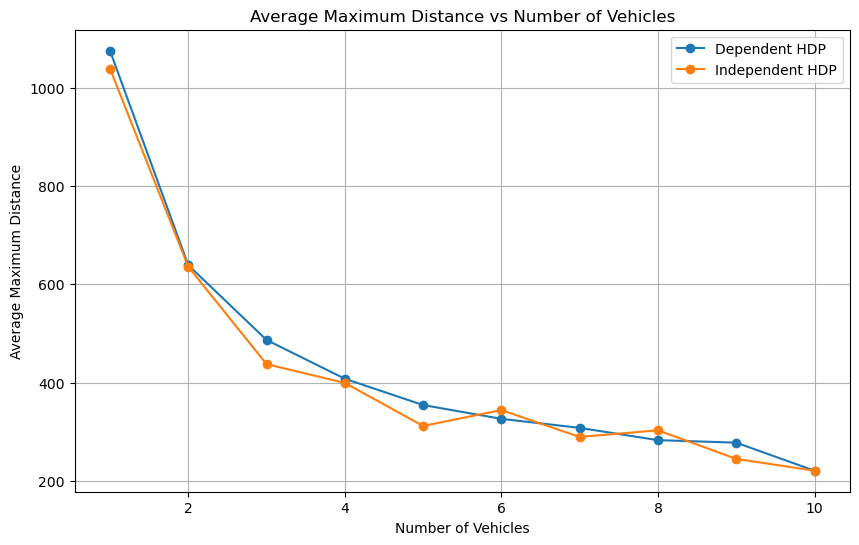

In [124]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['max distance'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

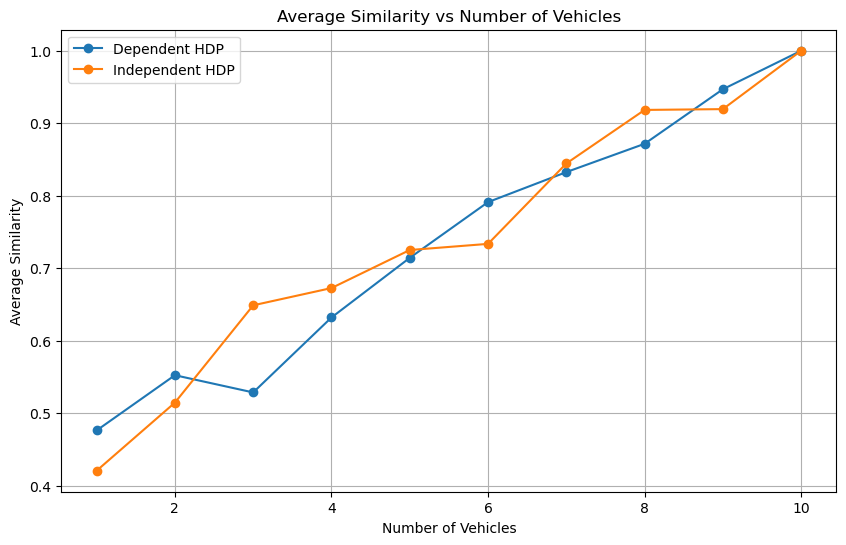

In [126]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(average_ind.index, average_ind['similarities'], label='Independent HDP', marker='o')

# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

# 2F EMO 3 vs 2F EMO 2

In [144]:
results_3obj

,similarities,number of vehicles,max distance
0,0.888889,8.0,220.611600
1,0.800000,7.0,346.267854
2,0.428571,1.0,892.884286
3,0.500000,3.0,540.302236
4,0.500000,2.0,530.302137
...,...,...,...
95,0.800000,7.0,240.076371
96,0.888889,7.0,247.708952
97,0.900000,9.0,220.611600
98,0.888889,7.0,353.831342


In [157]:
# Get the index of the minimum similarity for each number of vehicles
min_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmin()

# Retrieve the rows corresponding to those indices
min_similarity_3obj = results_3obj.loc[min_similarity_indices]
min_similarity_3obj = min_similarity_3obj.set_index('number of vehicles')
min_similarity_3obj

,similarities,max distance
number of vehicles,,
1.0,0.166667,1001.029444
2.0,0.500000,530.302137
3.0,0.428571,445.310374
4.0,0.500000,395.195515
5.0,0.625000,401.193546
6.0,0.666667,346.267854
7.0,0.700000,220.611600
8.0,0.800000,220.611600
9.0,0.900000,234.308745


In [160]:
# Get the index of the maximum similarity for each number of vehicles
max_similarity_indices = results_3obj.groupby('number of vehicles')['similarities'].idxmax()

# Retrieve the rows corresponding to those indices
max_similarity_3obj = results_3obj.loc[max_similarity_indices]
max_similarity_3obj = max_similarity_3obj.set_index('number of vehicles')
max_similarity_3obj


,similarities,max distance
number of vehicles,,
1.0,0.571429,1028.263527
2.0,0.666667,516.618407
3.0,0.714286,542.479872
4.0,0.714286,353.831342
5.0,0.857143,353.831342
6.0,0.888889,353.301056
7.0,0.888889,247.708952
8.0,1.000000,225.857969
9.0,1.000000,221.711427


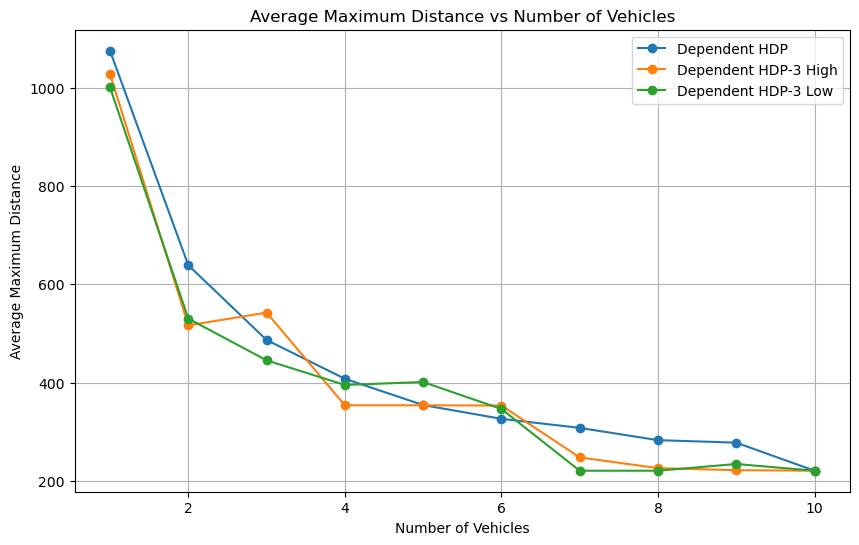

In [161]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['max distance'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(max_similarity_3obj.index, max_similarity_3obj['max distance'], label='Dependent HDP-3 High', marker='o')

plt.plot(min_similarity_3obj.index, min_similarity_3obj['max distance'], label='Dependent HDP-3 Low', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Maximum Distance')
plt.title('Average Maximum Distance vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [164]:
# Get the index of the minimum distance for each number of vehicles
min_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmin()

# Retrieve the rows corresponding to those indices
min_distance_3obj = results_3obj.loc[min_distance_indices]
min_distance_3obj = min_distance_3obj.set_index('number of vehicles')
min_distance_3obj

,similarities,max distance
number of vehicles,,
1.0,0.428571,892.884286
2.0,0.666667,516.618407
3.0,0.666667,264.808244
4.0,0.571429,283.815110
5.0,0.714286,235.700567
6.0,0.777778,240.076371
7.0,0.750000,220.611600
8.0,0.888889,220.611600
9.0,0.900000,220.611600


In [165]:
# Get the index of the maximum distance for each number of vehicles
max_distance_indices = results_3obj.groupby('number of vehicles')['max distance'].idxmax()

# Retrieve the rows corresponding to those indices
max_distance_3obj = results_3obj.loc[max_distance_indices]
max_distance_3obj = max_distance_3obj.set_index('number of vehicles')
max_distance_3obj

,similarities,max distance
number of vehicles,,
1.0,0.500000,1246.457766
2.0,0.500000,869.926577
3.0,0.500000,697.935404
4.0,0.625000,428.601254
5.0,0.714286,401.193546
6.0,0.666667,401.193546
7.0,0.875000,385.792462
8.0,0.888889,401.193546
9.0,1.000000,385.792462


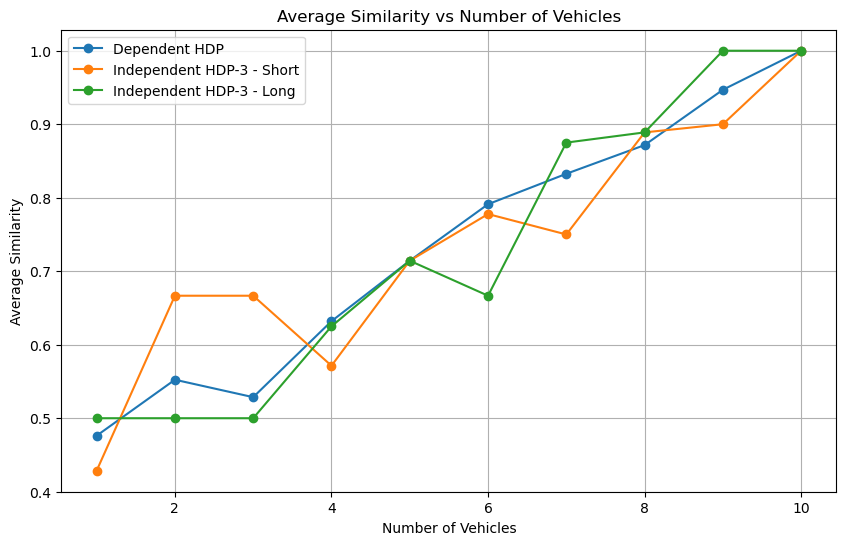

In [166]:
import matplotlib.pyplot as plt

# Assuming average_dep and average_ind are already defined as DataFrames
plt.figure(figsize=(10, 6))

# Plotting the average maximum distance for dependent HDP
plt.plot(average_dep.index, average_dep['similarities'], label='Dependent HDP', marker='o')

# Plotting the average maximum distance for independent HDP
plt.plot(min_distance_3obj.index, min_distance_3obj['similarities'], label='Independent HDP-3 - Short', marker='o')

plt.plot(max_distance_3obj.index, max_distance_3obj['similarities'], label='Independent HDP-3 - Long', marker='o')


# Adding labels and title
plt.xlabel('Number of Vehicles')
plt.ylabel('Average Similarity')
plt.title('Average Similarity vs Number of Vehicles')
plt.legend()
plt.grid()

# Show the plot
plt.show()